In [1]:
pip install fortran-magic

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 13.5 MB/s eta 0:00:00


In [2]:
%reload_ext fortranmagic

In [7]:
%matplotlib inline
%load_ext fortranmagic

import sys; sys.path.append('..')

import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

mpl.rc('figure', figsize=(12, 7))

ran_the_first_cell = True

jan2017 = pd.to_datetime(['2017-01-03 00:00:00+00:00',
 '2017-01-04 00:00:00+00:00',
 '2017-01-05 00:00:00+00:00',
 '2017-01-06 00:00:00+00:00',
 '2017-01-09 00:00:00+00:00',
 '2017-01-10 00:00:00+00:00',
 '2017-01-11 00:00:00+00:00',
 '2017-01-12 00:00:00+00:00',
 '2017-01-13 00:00:00+00:00',
 '2017-01-17 00:00:00+00:00',
 '2017-01-18 00:00:00+00:00',
 '2017-01-19 00:00:00+00:00',
 '2017-01-20 00:00:00+00:00',
 '2017-01-23 00:00:00+00:00',
 '2017-01-24 00:00:00+00:00',
 '2017-01-25 00:00:00+00:00',
 '2017-01-26 00:00:00+00:00',
 '2017-01-27 00:00:00+00:00',
 '2017-01-30 00:00:00+00:00',
 '2017-01-31 00:00:00+00:00',
 '2017-02-01 00:00:00+00:00'])
calendar = jan2017.values.astype('datetime64[D]')

event_dates = pd.to_datetime(['2017-01-06 00:00:00+00:00',
                             '2017-01-07 00:00:00+00:00',
                             '2017-01-08 00:00:00+00:00']).values.astype('datetime64[D]')
event_values = np.array([10, 15, 20])

The fortranmagic extension is already loaded. To reload it, use:
  %reload_ext fortranmagic


In [4]:
## Run this cell to test it
!git clone https://github.com/ssanderson/pydata-toolbox

Cloning into 'pydata-toolbox'...
remote: Enumerating objects: 88, done.
remote: Counting objects: 100% (36/36), done.
remote: Compressing objects: 100% (28/28), done.
remote: Total 88 (delta 22), reused 14 (delta 8), pack-reused 52 (from 1)
Receiving objects: 100% (88/88), 11.87 MiB | 20.64 MiB/s, done.
Resolving deltas: 100% (35/35), done.


In [ ]:
!git clone https://github.com/ssanderson/pydata-toolbox

fatal: destination path 'pydata-toolbox' already exists and is not an empty directory.


<center>
  <h1>The PyData Toolbox</h1>
  <h3>Scott Sanderson (Twitter: @scottbsanderson, GitHub: ssanderson)</h3>
  <h3><a href="https://github.com/ssanderson/pydata-toolbox">https://github.com/ssanderson/pydata-toolbox</a></h3>
</center>

# About Me:

<img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/me.jpg" alt="Drawing" style="width: 300px;"/>

- Senior Engineer at [Quantopian](www.quantopian.com)
- Background in Mathematics and Philosophy
- **Twitter:** [@scottbsanderson](https://twitter.com/scottbsanderson)
- **GitHub:** [ssanderson](github.com/ssanderson)

## Outline

- Built-in Data Structures
- Numpy `array`
- Pandas `Series`/`DataFrame`
- Plotting and "Real-World" Analyses

# Data Structures

> Rule 5. Data dominates. If you've chosen the right data structures and organized things well, the algorithms
will almost always be self-evident. Data structures, not algorithms, are central to programming.

- *Notes on Programming in C*, by Rob Pike.

# Lists

In [ ]:
assert ran_the_first_cell, "Oh noes!"

NameError: ignored

In [ ]:
l = [1, 'two', 3.0, 4, 5.0, "six"]
l

[1, 'two', 3.0, 4, 5.0, 'six']

In [ ]:
# Lists can be indexed like C-style arrays.
first = l[0]
second = l[1]
print("first:", first)
print("second:", second)

first: 1
second: two


In [ ]:
# Negative indexing gives elements relative to the end of the list.
last = l[-1]
penultimate = l[-2]
print("last:", last)
print("second to last:", penultimate)

last: six
second to last: 5.0


In [ ]:
# Lists can also be sliced, which makes a copy of elements between
# start (inclusive) and stop (exclusive)
sublist = l[1:3]
sublist

['two', 3.0]

In [ ]:
# l[:N] is equivalent to l[0:N].
first_three = l[:3]
first_three

[1, 'two', 3.0]

In [ ]:
# l[3:] is equivalent to l[3:len(l)].
after_three = l[3:]
after_three

[4, 5.0, 'six']

In [ ]:
# There's also a third parameter, "step", which gets every Nth element.
l = ['a', 'b', 'c', 'd', 'e', 'f', 'g','h']
l[1:7:2]

['b', 'd', 'f']

In [ ]:
# This is a cute way to reverse a list.
l[::-1]

['h', 'g', 'f', 'e', 'd', 'c', 'b', 'a']

In [ ]:
# Lists can be grown efficiently (in O(1) amortized time).
l = [1, 2, 3, 4, 5]
print("Before:", l)
l.append('six')
print("After:", l)

Before: [1, 2, 3, 4, 5]
After: [1, 2, 3, 4, 5, 'six']


In [ ]:
# Comprehensions let us perform elementwise computations.
l = [1, 2, 3, 4, 5]
[x * 2 for x in l]

[2, 4, 6, 8, 10]

## Review: Python Lists

- Zero-indexed sequence of arbitrary Python values.
- Slicing syntax: `l[start:stop:step]` copies elements at regular intervals from `start` to `stop`.
- Efficient (`O(1)`) appends and removes from end.
- Comprehension syntax: `[f(x) for x in l if cond(x)]`.

# Dictionaries

In [ ]:
# Dictionaries are key-value mappings.
philosophers = {'David': 'Hume', 'Immanuel': 'Kant', 'Bertrand': 'Russell'}
philosophers

{'Bertrand': 'Russell', 'David': 'Hume', 'Immanuel': 'Kant'}

In [ ]:
# Like lists, dictionaries are size-mutable.
philosophers['Ludwig'] = 'Wittgenstein'
philosophers

{'Bertrand': 'Russell',
 'David': 'Hume',
 'Immanuel': 'Kant',
 'Ludwig': 'Wittgenstein'}

In [ ]:
del philosophers['David']
philosophers

{'Bertrand': 'Russell', 'Immanuel': 'Kant', 'Ludwig': 'Wittgenstein'}

In [ ]:
# No slicing.
philosophers['Bertrand':'Immanuel']

TypeError: unhashable type: 'slice'

## Review: Python Dictionaries

- Unordered key-value mapping from (almost) arbitrary keys to arbitrary values.
- Efficient (`O(1)`) lookup, insertion, and deletion.
- No slicing (would require a notion of order).

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/pacino.gif" alt="Drawing" style="width: 100%;"/></center>


In [ ]:
4 * "a"

'aaaa'

In [5]:
# Suppose we have some matrices...
a = [[1, 2, 3],
     [2, 3, 4],
     [5, 6, 7],
     [1, 1, 1]]

b = [[1, 2, 3, 4],
     [2, 3, 4, 5]]

In [6]:
def matmul(A, B):
    """Multiply matrix A by matrix B."""
    rows_out = len(A)
    cols_out = len(B[0])
    out = [[0 for col in range(cols_out)] for row in range(rows_out)]

    for i in range(rows_out):
        for j in range(cols_out):
            for k in range(len(B)):
                out[i][j] += A[i][k] * B[k][j]
    return out

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/gross.gif" alt="Drawing" style="width: 50%;"/></center>


In [7]:
%%time

matmul(a, b)

CPU times: user 32 µs, sys: 4 µs, total: 36 µs
Wall time: 40.8 µs


[[5, 8, 11, 14], [8, 13, 18, 23], [17, 28, 39, 50], [3, 5, 7, 9]]

**My own example 0 - cpu info**

In [8]:
!cat /proc/cpuinfo

processor	: 0
vendor_id	: GenuineIntel
cpu family	: 6
model		: 79
model name	: Intel(R) Xeon(R) CPU @ 2.20GHz
stepping	: 0
microcode	: 0xffffffff
cpu MHz		: 2200.260
cache size	: 56320 KB
physical id	: 0
siblings	: 2
core id		: 0
cpu cores	: 1
apicid		: 0
initial apicid	: 0
fpu		: yes
fpu_exception	: yes
cpuid level	: 13
wp		: yes
flags		: fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pge mca cmov pat pse36 clflush mmx fxsr sse sse2 ss ht syscall nx pdpe1gb rdtscp lm constant_tsc rep_good nopl xtopology nonstop_tsc cpuid tsc_known_freq pni pclmulqdq ssse3 fma cx16 pcid sse4_1 sse4_2 x2apic movbe popcnt aes xsave avx f16c rdrand hypervisor lahf_lm abm 3dnowprefetch invpcid_single ssbd ibrs ibpb stibp fsgsbase tsc_adjust bmi1 hle avx2 smep bmi2 erms invpcid rtm rdseed adx smap xsaveopt arat md_clear arch_capabilities
bugs		: cpu_meltdown spectre_v1 spectre_v2 spec_store_bypass l1tf mds swapgs taa mmio_stale_data retbleed bhi
bogomips	: 4400.52
clflush size	: 64
cache_alignment	: 64
ad

**My own example 1 - Changing in matmul(A, B) Python len(B) (# of rows of B) for len(A[0]) (# of columns of A)**

In [8]:
def matmul(A, B):
    """Multiply matrix A by matrix B."""
    rows_out = len(A)
    cols_out = len(B[0])
    out = [[0 for col in range(cols_out)] for row in range(rows_out)]

    for i in range(rows_out):
        for j in range(cols_out):
            for k in range( len(A[0])):
                out[i][j] += A[i][k] * B[k][j]
    return out

**My own example 2 - Verifiying error with in matmul(A, B) Python with the original matrices when changing len(B) (# of rows of B) for len(A[0]) (# of colums of A)**

In [9]:
%%time
try:
  matmul(a, b)
except Exception as e:
  print('matrices not compatibles',e)

matrices not compatibles name 'a' is not defined
CPU times: user 157 µs, sys: 23 µs, total: 180 µs
Wall time: 138 µs


**My own example 3 - Chekcing the mtarix multiplication compatibility condition  len(A[0]) == len(B)**

In [10]:
def matmul(A, B):
    """Multiply matrix A by matrix B with a compatibility check."""
    # Check compatibility for matrix multiplication
    if len(A[0]) != len(B):
        print("Matrix multiplication not compatible: columns of A do not match rows of B.")
        return None

    rows_out = len(A)
    cols_out = len(B[0])
    out = [[0 for col in range(cols_out)] for row in range(rows_out)]

    for i in range(rows_out):
        for j in range(cols_out):
            for k in range(len(A[0])):  # Use len(A[0]) to match columns of A with rows of B
                out[i][j] += A[i][k] * B[k][j]
    return out

**My own example 4 -  Verifiying error with in matmul(A, B) Python when checking the mtarix multiplication compatibility condition  len(A[0]) == len(B)**

In [11]:
a = [[1, 2, 3],
     [2, 3, 4],
     [5, 6, 7],
     [1, 1, 1]]

b = [[1, 2, 3, 4],
     [2, 3, 4, 5]]

result = matmul(a, b)

Matrix multiplication not compatible: columns of A do not match rows of B.


**My own example 5 - Deifining A and B that are compatible for multiplcation**

In [12]:
A = [
    [1, 2],
    [3, 4],
    [5, 6]
]

B = [
    [7, 8, 9, 10],
    [11, 12, 13, 14]
]

result = matmul(A, B)
print (result)

[[29, 32, 35, 38], [65, 72, 79, 86], [101, 112, 123, 134]]


**My own example 6 - Runinng the correct Python matrix multiplication code with the matrices with dimensions compatible for multiplication.**

In [13]:
import random

In [14]:
random.normalvariate(0,1)

1.3908520262146091

In [15]:
import random
def random_matrix(m, n):
    out = []
    for row in range(m):
        out.append([random.random() for _ in range(n)])
    return out

randm = random_matrix(2, 3)
randm

[[0.8713360401166754, 0.4346715167294508, 0.3455063435942999],
 [0.5063404295374458, 0.5347268269551336, 0.6186836180937668]]

**My own example 7 - Running 10 times matmul(randa, randb) with randa and randb a randon matrices of 600 x 100 and 100 x 600 and calulating the average execution time**

In [16]:
%%time

import time


total_time=0
#measuring exec times
t1= time.time()

for i in range (10):
  A= random_matrix(600,100)
  B= random_matrix(100,600)
  matmul(A, B)

t2=time.time()

average_time= (t2-t1)/10
print(f"Average execution time: {average_time} seconds")

Average execution time: 9.78224081993103 seconds
CPU times: user 1min 35s, sys: 272 ms, total: 1min 35s
Wall time: 1min 37s


**My own example 8 - Creating the average execution time data frame and adding Python's average execution time**

In [17]:
import pandas as pd

# Create a DataFrame to store individual and average execution times
data=[['python',average_time]]
df = pd.DataFrame(data,columns=['Language','Average time per run (seconds)']
)



# Display the DataFrame
print(df)




  Language  Average time per run (seconds)
0   python                        9.782241


**My own example 9 - Running 10 times randa and randb mutiplicaction as NumPy arrays  adding NumPy's average execution time**

In [18]:
%%time
import numpy as np

randa= random_matrix(600,100)
randb= random_matrix(100,600)

# Measure the execution time for 10 runs
t1= time.perf_counter()
for i in range(10):
    np.matmul(randa, randb)  # Use NumPy's matrix multiplication

# Calculate the average execution time
t2=time.perf_counter()
average_time= (t2-t1)/10

# Display the average execution time
print(f"Average execution time for NumPy multiplication over 10 runs: {average_time:.4f} seconds")

Average execution time for NumPy multiplication over 10 runs: 0.0218 seconds
CPU times: user 211 ms, sys: 85.7 ms, total: 297 ms
Wall time: 246 ms


In [19]:
df.loc[len(df.index)]=['numpy',average_time]

In [20]:
print(df)

  Language  Average time per run (seconds)
0   python                        9.782241
1    numpy                        0.021786


In [21]:
%%time
randa = random_matrix(600, 100)
randb = random_matrix(100, 600)
x = matmul(randa, randb)

CPU times: user 9.05 s, sys: 26 ms, total: 9.07 s
Wall time: 9.11 s


In [22]:
# Maybe that's not that bad?  Let's try a simpler case.
def python_dot_product(xs, ys):
    return sum(x * y for x, y in zip(xs, ys))

In [29]:
!pip install "setuptools <65"

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 13.4 MB/s eta 0:00:00
  Attempting uninstall: setuptools
    Found existing installation: setuptools 75.1.0
    Uninstalling setuptools-75.1.0:
      Successfully uninstalled setuptools-75.1.0


In [2]:
pip install -U fortran-magic

In [3]:
%reload_ext fortranmagic

In [4]:
%fortran_config --clean-cache

Clean cache: /root/.cache/ipython/fortranmagic/233cd01e


In [5]:
%%fortran

subroutine fortran_dot_product(xs, ys, result)
    double precision, intent(in) :: xs(:)
    double precision, intent(in) :: ys(:)
    double precision, intent(out) :: result

    result = sum(xs * ys)
end subroutine fortran_dot_product

In [23]:
list_data = [float(i) for i in range(100000)]
array_data = np.array(list_data)

print (array_data)

[0.0000e+00 1.0000e+00 2.0000e+00 ... 9.9997e+04 9.9998e+04 9.9999e+04]


In [24]:
%%time
python_dot_product(list_data, list_data)

CPU times: user 11.4 ms, sys: 0 ns, total: 11.4 ms
Wall time: 11.6 ms


333328333350000.0

In [25]:
%%time
fortran_dot_product(array_data, array_data)

CPU times: user 269 µs, sys: 0 ns, total: 269 µs
Wall time: 278 µs


333328333350000.0

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/sloth.gif" alt="Drawing" style="width: 1080px;"/></center>


**My own example 10 - Deifining A (2x2)  and B (2x2)**

In [26]:
randa= random_matrix(2,2)
randb= random_matrix(2,2)

A= np.array(randa)
B= np.array(randb)


**My own example 11 - Defining Fortran subroutine matmul(A,B) for 2x2 matrices**

In [27]:
%%fortran
subroutine matmul(A,B,result)
  implicit none
  double precision, intent(in) :: A(2, 2), B(2, 2)
  double precision, intent(out) :: result(2, 2)

  ! Matrix multiplication using A and B from the module
  result(1, 1) = A(1, 1) * B(1, 1) + A(1, 2) * B(2, 1)
  result(1, 2) = A(1, 1) * B(1, 2) + A(1, 2) * B(2, 2)
  result(2, 1) = A(2, 1) * B(1, 1) + A(2, 2) * B(2, 1)
  result(2, 2) = A(2, 1) * B(1, 2) + A(2, 2) * B(2, 2)
end subroutine matmul

**My own example 12 -Run Fortran subroutine matmul(A,B) with a and b 2x2 matrices**

In [28]:
print(matmul(A,B))

[[0.45020911 0.24711071]
 [0.41368592 0.47975976]]


**My own example 13 - Defining Fortran subroutine matmul(A,B) for 600x100 and 100x600 matrices**

In [29]:
%%fortran
subroutine matmul(A, B, result)
  implicit none
  integer, parameter :: m = 600, n = 100, p = 600
  double precision, intent(in) :: A(m, n), B(n, p)
  double precision, intent(out) :: result(m, p)
  integer :: i, j, k

  do i = 1, m
    do j = 1, p
      result(i, j) = 0.0d0
      do k = 1, n
        result(i, j) = result(i, j) + A(i, k) * B(k, j)
      end do
    end do
  end do

end subroutine matmul

**My own example 14 -Run Fortran subroutine matmul(A,B) with 600x100 and 100x600 matrices**

In [31]:
%%time
import time
randa= random_matrix(600,100)
randb= random_matrix(100,600)

A= np.array(randa)
B= np.array(randb)


matmul(A,B)


CPU times: user 102 ms, sys: 2.93 ms, total: 105 ms
Wall time: 260 ms


array([[25.13872854, 24.11664726, 24.73748584, ..., 24.3503908 ,
        25.64506594, 26.02815808],
       [25.86170358, 23.2050462 , 23.41196838, ..., 26.51864888,
        24.19054969, 23.86124403],
       [23.21522589, 22.53054529, 22.63810403, ..., 23.02712521,
        21.4903183 , 22.04291047],
       ...,
       [26.5844201 , 24.37351224, 24.44498365, ..., 25.52707817,
        23.92536975, 26.75674837],
       [28.49317573, 26.13074691, 25.30136043, ..., 26.72557168,
        24.78556792, 25.15705029],
       [26.64329711, 24.39944256, 23.28010869, ..., 25.81146189,
        23.45165652, 26.42918525]])

**My own example 15 - Running 10 times the  Fortran subroutine matmul(A,B) with 600x100 and 100x600 matrices and adding Fortran magic average execution time to the data frame**

In [32]:
randa= random_matrix(600,100)
randb= random_matrix(100,600)

A= np.array(randa)
B= np.array(randb)

t1=time.perf_counter()
for _ in range(10):
    matmul(A,B)  # Use fortran multplication

# Calculate the average execution time
t2=time.perf_counter()

average_time= (t2-t1)/10

# Display the average execution time
print(f"Average execution time for fortran multiplication over 10 runs: {average_time:.4f} seconds")

df.loc[len(df.index)]=['fortranmagic',average_time]



Average execution time for fortran multiplication over 10 runs: 0.0431 seconds


In [33]:
print(df)

       Language  Average time per run (seconds)
0        python                        9.782241
1         numpy                        0.021786
2  fortranmagic                        0.043109


**My own example 16 - Creating a  Fortran program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [34]:
%%writefile matmul.f90
program matrix_multiply

    implicit none

    integer, parameter :: n = 600
    integer, parameter :: m = 100
    integer, parameter :: rep = 10

    real(8) :: matA(n, m)
    real(8) :: matB(m, n)
    real(8) :: matC(n, n)

    integer :: i, j, k, r
    real(8) :: tstart, tend

    ! Initialize matrices A and B (for simplicity, use random values)
    call random_seed()
    do i = 1, n
        do j = 1, m
            call random_number(matA(i, j))
        end do
    end do
    do i = 1, m
        do j = 1, n
            call random_number(matB(i, j))
        end do
    end do

    do r = 1, rep
        call cpu_time(tstart)
        do i = 1, n
            do j = 1, n
                matC(i, j) = 0.0
                do k = 1, m
                    matC(i, j) = matC(i, j) + matA(i, k) * matB(k, j)
                end do
            end do
        end do
        call cpu_time(tend)

    end do

    write(*, '(A, F12.6)') "Average Fortran execution time: ", (tend - tstart) / rep, " seconds"

end program matrix_multiply

Writing matmul.f90


**My own example 17 - Running the Fortran program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [35]:
#running the fortran program

!gfortran -o matmul matmul.f90


In [36]:
%%time

!./matmul




Average Fortran execution time:     0.023709
 seconds
CPU times: user 23.9 ms, sys: 5.02 ms, total: 28.9 ms
Wall time: 2.41 s


**My own example 18 - Adding Fortran average execution time to the data frame**

In [37]:
average_time=0.023709
df.loc[len(df.index)] = ['fortran', average_time]

In [38]:
print(df)

       Language  Average time per run (seconds)
0        python                        9.782241
1         numpy                        0.021786
2  fortranmagic                        0.043109
3       fortran                        0.023709


**My own example 19 - Creating a c program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [39]:
%%writefile matmul.c

#include <stdio.h>
#include <time.h>
#include <stdlib.h>

double **matmul(double **A, double **B, int rows_out, int cols, int cols_out) {
    double **out = (double **)malloc(rows_out * sizeof(double *));
    for (int i = 0; i < rows_out; i++) {
        out[i] = (double *)malloc(cols_out * sizeof(double));
        for (int j = 0; j < cols_out; j++) {
            out[i][j] = 0;
            for (int k = 0; k < cols; k++) {
                out[i][j] += A[i][k] * B[k][j];
            }
        }
    }
    return out;
}

double **create_random_matrix(int m, int n) {
    double **out = (double **)malloc(m * sizeof(double *));
    for (int i = 0; i < m; i++) {
        out[i] = (double *)malloc(n * sizeof(double));
        for (int j = 0; j < n; j++) {
            out[i][j] = ((double)rand() / RAND_MAX);
        }
    }
    return out;
}

int main() {
    srand(time(NULL));
    double time_sum = 0;

    for (int i = 0; i < 10; i++) {
        clock_t start_time = clock();
        double **randa = create_random_matrix(600, 100);
        double **randb = create_random_matrix(100, 600);
        double **matrixC = matmul(randa, randb, 600, 100, 600);
        clock_t end_time = clock();
        time_sum += (double)(end_time - start_time) / CLOCKS_PER_SEC;

        free(randa);
        free(randb);
        free(matrixC);
    }

    double average_time_c = (time_sum / 10);
    printf("%f\n", average_time_c);

    return 0;
}

Writing matmul.c


**My own example 20 - Running the c program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [40]:
!gcc matmul.c -o matmulc


In [41]:
!./matmulc


0.250001


**My own example 21 - Adding c average execution time to the data frame**

In [42]:
average_time=0.250001
df.loc[len(df.index)] = ['c', average_time]

print(df)

       Language  Average time per run (seconds)
0        python                        9.782241
1         numpy                        0.021786
2  fortranmagic                        0.043109
3       fortran                        0.023709
4             c                        0.250001


**My own example 22 - Creating a C++ program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [43]:
%%writefile matmul.cpp
#include <iostream>
#include <ctime>
#include <cstdlib>

const int N = 600;
const int M = 100;
const int REPETITIONS = 10;

void matrix_multiply(double matA[N][M], double matB[M][N], double matC[N][N]) {
    for (int i = 0; i < N; i++) {
        for (int j = 0; j < N; j++) {
            matC[i][j] = 0.0;
            for (int k = 0; k < M; k++) {
                matC[i][j] += matA[i][k] * matB[k][j];
            }
        }
    }
}

int main() {
    double countTime = 0;
    double matA[N][M], matB[M][N], matC[N][N];
    clock_t start, end;

    // Initialize matrices A and B (for simplicity, use random values)
    srand(time(NULL));
    for (int i = 0; i < N; i++) {
        for (int j = 0; j < M; j++) {
            matA[i][j] = (double)rand() / RAND_MAX;
            matB[j][i] = (double)rand() / RAND_MAX;
        }
    }

    for (int r = 0; r < REPETITIONS; r++) {
        start = clock();
        matrix_multiply(matA, matB, matC);
        end = clock();
        double time_taken = (double)(end - start) / CLOCKS_PER_SEC;
        countTime=countTime+time_taken ;
    }
  std::cout << "Average time of c++: "<<countTime/10;
    return 0;
}

Writing matmul.cpp


**My own example 23 - Running the C++ program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [44]:
!g++ matmul.cpp -o matmul
!./matmul

Average time of c++: 0.191903

**My own example 24 - Adding C++ average execution time to the data frame**

In [45]:
average_time=0.191903
df.loc[len(df.index)] = ['c++', average_time]

print(df)

       Language  Average time per run (seconds)
0        python                        9.782241
1         numpy                        0.021786
2  fortranmagic                        0.043109
3       fortran                        0.023709
4             c                        0.250001
5           c++                        0.191903


**My own example 25 - Creating a Java program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [46]:
%%writefile MatrixMultiply.java
import java.util.Random;
public class MatrixMultiply {
    public static void main(String[] args) {
        final int N = 600;
        final int M = 100;
        final int REPETITIONS = 10;

        double[][] matA = new double[N][M];
        double[][] matB = new double[M][N];
        double[][] matC = new double[N][N];

        // Initialize matrices A and B (for simplicity, use random values)
        for (int i = 0; i < N; i++) {
            for (int j = 0; j < M; j++) {
                matA[i][j] = Math.random();
                matB[j][i] = Math.random();
            }
        }

        for (int r = 0; r < REPETITIONS; r++) {
            long startTime = System.nanoTime();
            matrixMultiply(matA, matB, matC);
            long endTime = System.nanoTime();

            double timeTaken = (endTime - startTime) / 1e9; // Convert to seconds
            System.out.println("Execution " + (r + 1) + " -> " + timeTaken + " seconds");
        }
    }

    public static void matrixMultiply(double[][] matA, double[][] matB, double[][] matC) {
        int N = matA.length;
        int M = matB.length;

        for (int i = 0; i < N; i++) {
            for (int j = 0; j < N; j++) {
                matC[i][j] = 0.0;
                for (int k = 0; k < M; k++) {
                    matC[i][j] += matA[i][k] * matB[k][j];
                }
            }
        }
    }
}

Writing MatrixMultiply.java


**My own example 26 - Running the Java program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [47]:
!javac MatrixMultiply.java
!java MatrixMultiply

Execution 1 -> 0.202777732 seconds
Execution 2 -> 0.135410957 seconds
Execution 3 -> 0.136981216 seconds
Execution 4 -> 0.136630498 seconds
Execution 5 -> 0.12759902 seconds
Execution 6 -> 0.15956433 seconds
Execution 7 -> 0.132785842 seconds
Execution 8 -> 0.138145607 seconds
Execution 9 -> 0.133062482 seconds
Execution 10 -> 0.189896657 seconds


**My own example 27 - Adding Java average execution time to the data frame**

In [48]:
import subprocess
import pandas as pd

# comiple in java
subprocess.run(["javac", "MatrixMultiply.java"])

# Number of repetitions on the program
rep = 10

# create a list to storage the timestapts
average_times = []

# run the program and capture de average times
for _ in range(rep):
    output = subprocess.check_output(["java", "MatrixMultiply"], text=True)
    lines = output.strip().split('\n')
    average_time = float(lines[-1].split()[-2])  # Obtener el tiempo promedio de la última línea
    average_times.append(average_time)

# Calculate
average_execution_java = sum(average_times) / rep

In [49]:
# Capture the time on the df
average_time=average_execution_java
df.loc[len(df.index)] = ['Java', average_time]

print(df)

       Language  Average time per run (seconds)
0        python                        9.782241
1         numpy                        0.021786
2  fortranmagic                        0.043109
3       fortran                        0.023709
4             c                        0.250001
5           c++                        0.191903
6          Java                        0.133856


**My own example 28 - Creating a Javascript program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [50]:
%%writefile matrixMultiply.js
function matrixMultiply(matA, matB) {
    const N = matA.length;
    const M = matB[0].length;
    const K = matB.length;

    const matC = new Array(N);
    for (let i = 0; i < N; i++) {
        matC[i] = new Array(M).fill(0);
    }

    for (let i = 0; i < N; i++) {
        for (let j = 0; j < M; j++) {
            for (let k = 0; k < K; k++) {
                matC[i][j] += matA[i][k] * matB[k][j];
            }
        }
    }

    return matC;
}

function generateRandomMatrix(rows, cols) {
    const matrix = new Array(rows);
    for (let i = 0; i < rows; i++) {
        matrix[i] = new Array(cols);
        for (let j = 0; j < cols; j++) {
            matrix[i][j] = Math.random();
        }
    }
    return matrix;
}

const N = 600;
const M = 100;
const REPETITIONS = 10;

for (let r = 0; r < REPETITIONS; r++) {
    const matA = generateRandomMatrix(N, M);
    const matB = generateRandomMatrix(M, N);

    const startTime = Date.now();
    matrixMultiply(matA, matB);
    const endTime = Date.now();

    const timeTaken = (endTime - startTime) / 1000; // Convert to seconds
    console.log(`Execution ${r + 1} -> ${timeTaken} seconds`);
}

Writing matrixMultiply.js


**My own example 29 - Running the Javascript program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [51]:
import subprocess
import pandas as pd

# Ejecutar el programa JavaScript y guardar la salida en un archivo
subprocess.run(["node", "matrixMultiply.js"], stdout=open("output.txt", "w"))

# Número de repeticiones en el programa JavaScript
rep = 10

# Leer los tiempos promedio desde el archivo
average_times = []
with open("output.txt", "r") as f:
    lines = f.readlines()
    for line in lines:
        average_time = float(line.split()[-2])  # Obtener el tiempo promedio de la línea
        average_times.append(average_time)

# Calcular el promedio de los tiempos
average_execution_JS = sum(average_times) / rep

**My own example 30 - Adding Javascript average execution time to the data frame**

In [52]:
# Capture the time on the df
average_time=average_execution_JS
df.loc[len(df.index)] = ['JavaScript', average_time]

print(df)

       Language  Average time per run (seconds)
0        python                        9.782241
1         numpy                        0.021786
2  fortranmagic                        0.043109
3       fortran                        0.023709
4             c                        0.250001
5           c++                        0.191903
6          Java                        0.133856
7    JavaScript                        0.403000


**My own example 31 - Finding the minimun average esecuiton time in the data frame**

In [53]:
#finding the minimun value

Minimum_average_time = df['Average time per run (seconds)'].min()
print("The minimun average time is: ", Minimum_average_time)

The minimun average time is:  0.02178644670000267


**My own example 32 - Adding the Speed factor columne to the data frame**

In [54]:
# Calculate speed factor
df['Speed Factor'] = df['Average time per run (seconds)']/Minimum_average_time



# Reset the index
df = df.reset_index(drop=True)
df

,Language,Average time per run (seconds),Speed Factor
0,python,9.782241,449.005795
1,numpy,0.021786,1.000000
2,fortranmagic,0.043109,1.978692
3,fortran,0.023709,1.088245
4,c,0.250001,11.475070
5,c++,0.191903,8.808366
6,Java,0.133856,6.143996
7,JavaScript,0.403000,18.497739


**My own example 33 - Sorting the the data frame by average execution time**

In [55]:
# Calculate speed factor
df['Speed Factor'] = df['Average time per run (seconds)']/Minimum_average_time



# Sort the df by the speed factor column
df = df.sort_values(by='Speed Factor',ascending=True)

#Reset the index
df = df.reset_index(drop=True)
df

,Language,Average time per run (seconds),Speed Factor
0,numpy,0.021786,1.000000
1,fortran,0.023709,1.088245
2,fortranmagic,0.043109,1.978692
3,Java,0.133856,6.143996
4,c++,0.191903,8.808366
5,c,0.250001,11.475070
6,JavaScript,0.403000,18.497739
7,python,9.782241,449.005795


## Why is the Python Version so Much Slower?

In [ ]:
# Dynamic typing.
def mul_elemwise(xs, ys):
    return [x * y for x, y in zip(xs, ys)]

mul_elemwise([1, 2, 3, 4], [1, 2 + 0j, 3.0, 'four'])
#[type(x) for x in _]

[1, (4+0j), 9.0, 'fourfourfourfour']

In [ ]:
# Interpretation overhead.
source_code = 'a + b * c'
bytecode = compile(source_code, '', 'eval')
import dis; dis.dis(bytecode)

  1           0 LOAD_NAME                0 (a)
              2 LOAD_NAME                1 (b)
              4 LOAD_NAME                2 (c)
              6 BINARY_MULTIPLY
              8 BINARY_ADD
             10 RETURN_VALUE


## Why is the Python Version so Slow?
- Dynamic typing means that every single operation requires dispatching on the input type.
- Having an interpreter means that every instruction is fetched and dispatched at runtime.
- Other overheads:
  - Arbitrary-size integers.
  - Reference-counted garbage collection.

> This is the paradox that we have to work with when we're doing scientific or numerically-intensive Python. What makes Python fast for development -- this high-level, interpreted, and dynamically-typed aspect of the language -- is exactly what makes it slow for code execution.

- Jake VanderPlas, [*Losing Your Loops: Fast Numerical Computing with NumPy*](https://www.youtube.com/watch?v=EEUXKG97YRw)

# What Do We Do?

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/runaway.gif" alt="Drawing" style="width: 50%;"/></center>

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/thisisfine.gif" alt="Drawing" style="width: 1080px;"/></center>

- Python is slow for numerical computation because it performs dynamic dispatch on every operation we perform...

- ...but often, we just want to do the same thing over and over in a loop!

- If we don't need Python's dynamicism, we don't want to pay (much) for it.

- **Idea:** Dispatch **once per operation** instead of **once per element**.

In [ ]:
import numpy as np

data = np.array([1, 2, 3, 4])
data

array([1, 2, 3, 4])

In [ ]:
data + data

array([2, 4, 6, 8])

In [ ]:
%%time
# Naive dot product
(array_data * array_data).sum()

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 408 µs


333328333350000.0

In [ ]:
%%time
# Built-in dot product.
array_data.dot(array_data)

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 162 µs


333328333350000.0

In [ ]:
%%time
fortran_dot_product(array_data, array_data)

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 313 µs


333328333350000.0

In [ ]:
# Numpy won't allow us to write a string into an int array.
data[0] = "foo"

ValueError: invalid literal for int() with base 10: 'foo'

In [ ]:
# We also can't grow an array once it's created.
data.append(3)

In [ ]:
# We **can** reshape an array though.
two_by_two = data.reshape(2, 2)
two_by_two

Numpy arrays are:

- Fixed-type

- Size-immutable

- Multi-dimensional

- Fast\*

\* If you use them correctly.

# What's in an Array?

In [ ]:
arr = np.array([1, 2, 3, 4, 5, 6], dtype='int16').reshape(2, 3)
print("Array:\n", arr, sep='')
print("===========")
print("DType:", arr.dtype)
print("Shape:", arr.shape)
print("Strides:", arr.strides)
print("Data:", arr.data.tobytes())

Array:
[[1 2 3]
 [4 5 6]]
DType: int16
Shape: (2, 3)
Strides: (6, 2)
Data: b'\x01\x00\x02\x00\x03\x00\x04\x00\x05\x00\x06\x00'


# Core Operations

- Vectorized **ufuncs** for elementwise operations.
- Fancy indexing and masking for selection and filtering.
- Aggregations across axes.
- Broadcasting

# UFuncs

UFuncs (universal functions) are functions that operate elementwise on one or more arrays.

In [ ]:
data = np.arange(15).reshape(3, 5)
data

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14]])

In [ ]:
# Binary operators.
data * data

array([[  0,   1,   4,   9,  16],
       [ 25,  36,  49,  64,  81],
       [100, 121, 144, 169, 196]])

In [ ]:
# Unary functions.
np.sqrt(data)

array([[ 0.        ,  1.        ,  1.41421356,  1.73205081,  2.        ],
       [ 2.23606798,  2.44948974,  2.64575131,  2.82842712,  3.        ],
       [ 3.16227766,  3.31662479,  3.46410162,  3.60555128,  3.74165739]])

In [ ]:
# Comparison operations
(data % 3) == 0

array([[ True, False, False,  True, False],
       [False,  True, False, False,  True],
       [False, False,  True, False, False]], dtype=bool)

In [ ]:
# Boolean combinators.
((data % 2) == 0) & ((data % 3) == 0)

array([[ True, False, False, False, False],
       [False,  True, False, False, False],
       [False, False,  True, False, False]], dtype=bool)

In [ ]:
# as of python 3.5, @ is matrix-multiply
data @ data.T

array([[ 30,  80, 130],
       [ 80, 255, 430],
       [130, 430, 730]])

# UFuncs Review

- UFuncs provide efficient elementwise operations applied across one or more arrays.
- Arithmetic Operators (`+`, `*`, `/`)
- Comparisons (`==`, `>`, `!=`)
- Boolean Operators (`&`, `|`, `^`)
- Trigonometric Functions (`sin`, `cos`)
- Transcendental Functions (`exp`, `log`)

# Selections

We often want to perform an operation on just a subset of our data.

In [ ]:
sines = np.sin(np.linspace(0, 3.14, 10))
cosines = np.cos(np.linspace(0, 3.14, 10))
sines

array([ 0.        ,  0.34185385,  0.64251645,  0.86575984,  0.98468459,
        0.98496101,  0.8665558 ,  0.64373604,  0.34335012,  0.00159265])

In [ ]:
# Slicing works with the same semantics as Python lists.
sines[0]

0.0

In [ ]:
sines[:3]  # First three elements

array([ 0.        ,  0.34185385,  0.64251645])

In [ ]:
sines[5:]  # Elements from 5 on.

array([ 0.98496101,  0.8665558 ,  0.64373604,  0.34335012,  0.00159265])

In [ ]:
sines[::2]  # Every other element.

array([ 0.        ,  0.64251645,  0.98468459,  0.8665558 ,  0.34335012])

In [ ]:
# More interesting: we can index with boolean arrays to filter by a predicate.
print("sines:\n", sines)
print("sines > 0.5:\n", sines > 0.5)
print("sines[sines > 0.5]:\n", sines[sines > 0.5])

sines:
 [ 0.          0.34185385  0.64251645  0.86575984  0.98468459  0.98496101
  0.8665558   0.64373604  0.34335012  0.00159265]
sines > 0.5:
 [False False  True  True  True  True  True  True False False]
sines[sines > 0.5]:
 [ 0.64251645  0.86575984  0.98468459  0.98496101  0.8665558   0.64373604]


In [ ]:
# We index with lists/arrays of integers to select values at those indices.
print(sines)
sines[[0, 4, 7]]

[ 0.          0.34185385  0.64251645  0.86575984  0.98468459  0.98496101
  0.8665558   0.64373604  0.34335012  0.00159265]


array([ 0.        ,  0.98468459,  0.64373604])

In [ ]:
# Index arrays are often used for sorting one or more arrays.
unsorted_data = np.array([1, 3, 2, 12, -1, 5, 2])

In [ ]:
sort_indices = np.argsort(unsorted_data)
sort_indices

array([4, 0, 2, 6, 1, 5, 3])

In [ ]:
unsorted_data[sort_indices]

array([-1,  1,  2,  2,  3,  5, 12])

In [ ]:
market_caps = np.array([12, 6, 10, 5, 6])  # Presumably in dollars?
assets = np.array(['A', 'B', 'C', 'D', 'E'])

In [ ]:
# Sort assets by market cap by using the permutation that would sort market caps on ``assets``.
sort_by_mcap = np.argsort(market_caps)
assets[sort_by_mcap]

array(['D', 'B', 'E', 'C', 'A'],
      dtype='<U1')

In [ ]:
# Indexers are also useful for aligning data.
print("Dates:\n", repr(event_dates))
print("Values:\n", repr(event_values))
print("Calendar:\n", repr(calendar))

Dates:
 array(['2017-01-06', '2017-01-07', '2017-01-08'], dtype='datetime64[D]')
Values:
 array([10, 15, 20])
Calendar:
 array(['2017-01-03', '2017-01-04', '2017-01-05', '2017-01-06',
       '2017-01-09', '2017-01-10', '2017-01-11', '2017-01-12',
       '2017-01-13', '2017-01-17', '2017-01-18', '2017-01-19',
       '2017-01-20', '2017-01-23', '2017-01-24', '2017-01-25',
       '2017-01-26', '2017-01-27', '2017-01-30', '2017-01-31', '2017-02-01'], dtype='datetime64[D]')


In [ ]:
print("Raw Dates:", event_dates)
print("Indices:", calendar.searchsorted(event_dates))
print("Forward-Filled Dates:", calendar[calendar.searchsorted(event_dates)])

Raw Dates: ['2017-01-06' '2017-01-07' '2017-01-08']
Indices: [3 4 4]
Forward-Filled Dates: ['2017-01-06' '2017-01-09' '2017-01-09']


On multi-dimensional arrays, we can slice along each axis independently.

In [ ]:
data = np.arange(25).reshape(5, 5)
data

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24]])

In [ ]:
data[:2, :2]  # First two rows and first two columns.

array([[0, 1],
       [5, 6]])

In [ ]:
data[:2, [0, -1]]  # First two rows, first and last columns.

array([[0, 4],
       [5, 9]])

In [ ]:
data[(data[:, 0] % 2) == 0]  # Rows where the first column is divisible by two.

array([[ 0,  1,  2,  3,  4],
       [10, 11, 12, 13, 14],
       [20, 21, 22, 23, 24]])

# Selections Review

- Indexing with an integer removes a dimension.
- Slicing operations work on Numpy arrays the same way they do on lists.
- Indexing with a boolean array filters to True locations.
- Indexing with an integer array selects indices along an axis.
- Multidimensional arrays can apply selections independently along different axes.

## Reductions

Functions that reduce an array to a scalar.

$Var(X) = \frac{1}{N}\sqrt{\sum_{i=1}^N (x_i - \bar{x})^2}$

In [ ]:
def variance(x):
    return ((x - x.mean()) ** 2).sum() / len(x)

In [ ]:
variance(np.random.standard_normal(1000))

1.0638195544963331

- `sum()` and `mean()` are both **reductions**.

- In the simplest case, we use these to reduce an entire array into a single value...

In [ ]:
data = np.arange(30)
data.mean()

14.5

- ...but we can do more interesting things with multi-dimensional arrays.

In [ ]:
data = np.arange(30).reshape(3, 10)
data

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24, 25, 26, 27, 28, 29]])

In [ ]:
data.mean()

14.5

In [ ]:
data.mean(axis=0)

array([ 10.,  11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.])

In [ ]:
data.mean(axis=1)

array([  4.5,  14.5,  24.5])

## Reductions Review

- Reductions allow us to perform efficient aggregations over arrays.
- We can do aggregations over a single axis to collapse a single dimension.
- Many built-in reductions (`mean`, `sum`, `min`, `max`, `median`, ...).

# Broadcasting

In [ ]:
row = np.array([1, 2, 3, 4])
column = np.array([[1], [2], [3]])
print("Row:\n", row, sep='')
print("Column:\n", column, sep='')

Row:
[1 2 3 4]
Column:
[[1]
 [2]
 [3]]


In [ ]:
row + column

array([[2, 3, 4, 5],
       [3, 4, 5, 6],
       [4, 5, 6, 7]])

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/broadcasting.png" alt="Drawing" style="width: 60%;"/></center>

<h5>Source: http://www.scipy-lectures.org/_images/numpy_broadcasting.png</h5>

In [ ]:
# Broadcasting is particularly useful in conjunction with reductions.
print("Data:\n", data, sep='')
print("Mean:\n", data.mean(axis=0), sep='')
print("Data - Mean:\n", data - data.mean(axis=0), sep='')

Data:
[[ 0  1  2  3  4  5  6  7  8  9]
 [10 11 12 13 14 15 16 17 18 19]
 [20 21 22 23 24 25 26 27 28 29]]
Mean:
[ 10.  11.  12.  13.  14.  15.  16.  17.  18.  19.]
Data - Mean:
[[-10. -10. -10. -10. -10. -10. -10. -10. -10. -10.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [ 10.  10.  10.  10.  10.  10.  10.  10.  10.  10.]]


# Broadcasting Review

- Numpy operations can work on arrays of different dimensions as long as the arrays' shapes are still "compatible".
- Broadcasting works by "tiling" the smaller array along the missing dimension.
- The result of a broadcasted operation is always at least as large in each dimension as the largest array in that dimension.

# Numpy Review

- Numerical algorithms are slow in pure Python because the overhead dynamic dispatch dominates our runtime.

- Numpy solves this problem by:
  1. Imposing additional restrictions on the contents of arrays.
  2. Moving the inner loops of our algorithms into compiled C code.

- Using Numpy effectively often requires reworking an algorithms to use vectorized operations instead of for-loops, but the resulting operations are usually simpler, clearer, and faster than the pure Python equivalent.

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/unicorn.jpg" alt="Drawing" style="width: 75%;"/></center>

Numpy is great for many things, but...

- Sometimes our data is equipped with a natural set of **labels**:
  - Dates/Times
  - Stock Tickers
  - Field Names (e.g. Open/High/Low/Close)

- Sometimes we have **more than one type of data** that we want to keep grouped together.
  - Tables with a mix of real-valued and categorical data.

- Sometimes we have **missing** data, which we need to ignore, fill, or otherwise work around.

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/panda-wrangling.gif" alt="Drawing" style="width: 75%;"/></center>

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/pandas_logo.png" alt="Drawing" style="width: 75%;"/></center>


Pandas extends Numpy with more complex data structures:

- `Series`: 1-dimensional, homogenously-typed, labelled array.
- `DataFrame`: 2-dimensional, semi-homogenous, labelled table.

Pandas also provides many utilities for:
- Input/Output
- Data Cleaning
- Rolling Algorithms
- Plotting

# Selection in Pandas

In [ ]:
s = pd.Series(index=['a', 'b', 'c', 'd', 'e'], data=[1, 2, 3, 4, 5])
s

a    1
b    2
c    3
d    4
e    5
dtype: int64

In [ ]:
# There are two pieces to a Series: the index and the values.
print("The index is:", s.index)
print("The values are:", s.values)

The index is: Index(['a', 'b', 'c', 'd', 'e'], dtype='object')
The values are: [1 2 3 4 5]


In [ ]:
# We can look up values out of a Series by position...
s.iloc[0]

1

In [ ]:
# ... or by label.
s.loc['a']

1

In [ ]:
# Slicing works as expected...
s.iloc[:2]

a    1
b    2
dtype: int64

In [ ]:
# ...but it works with labels too!
s.loc[:'c']

a    1
b    2
c    3
dtype: int64

In [ ]:
# Fancy indexing works the same as in numpy.
s.iloc[[0, -1]]

a    1
e    5
dtype: int64

In [ ]:
# As does boolean masking.
s.loc[s > 2]

c    3
d    4
e    5
dtype: int64

In [ ]:
# Element-wise operations are aligned by index.
other_s = pd.Series({'a': 10.0, 'c': 20.0, 'd': 30.0, 'z': 40.0})
other_s

a    10.0
c    20.0
d    30.0
z    40.0
dtype: float64

In [ ]:
s + other_s

a    11.0
b     NaN
c    23.0
d    34.0
e     NaN
z     NaN
dtype: float64

In [ ]:
# We can fill in missing values with fillna().
(s + other_s).fillna(0.0)

a    11.0
b     0.0
c    23.0
d    34.0
e     0.0
z     0.0
dtype: float64

In [ ]:
# Most real datasets are read in from an external file format.
aapl = pd.read_csv('AAPL.csv', parse_dates=['Date'], index_col='Date')
aapl.head()

,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2010-01-04,27.613066,30.572857,30.642857,30.340000,30.490000,123432400.0
2010-01-05,27.660807,30.625713,30.798571,30.464285,30.657143,150476200.0
2010-01-06,27.220825,30.138571,30.747143,30.107143,30.625713,138040000.0
2010-01-07,27.170504,30.082857,30.285715,29.864286,30.250000,119282800.0
2010-01-08,27.351143,30.282858,30.285715,29.865715,30.042856,111902700.0


In [ ]:
# Slicing generalizes to two dimensions as you'd expect:
aapl.iloc[:2, :2]

,Adj Close,Close
Date,,
2010-01-04,27.613066,30.572857
2010-01-05,27.660807,30.625713


In [ ]:
aapl.loc[pd.Timestamp('2010-02-01'):pd.Timestamp('2010-02-04'), ['Close', 'Volume']]

,Close,Volume
Date,,
2010-02-01,27.818571,187469100.0
2010-02-02,27.980000,174585600.0
2010-02-03,28.461428,153832000.0
2010-02-04,27.435715,189413000.0


# Rolling Operations

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/rolling.gif" alt="Drawing" style="width: 75%;"/></center>

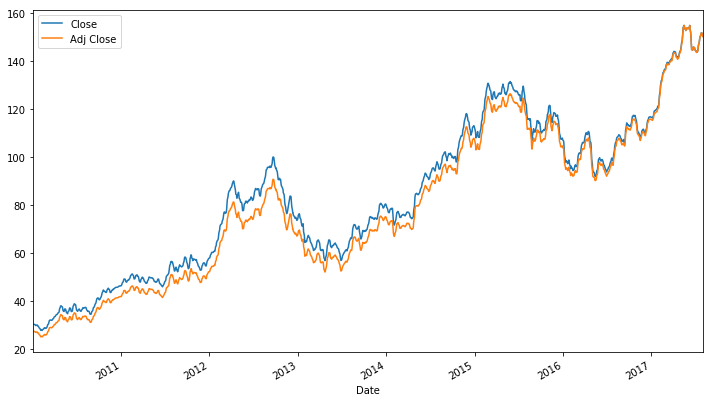

In [ ]:
aapl.rolling(5)[['Close', 'Adj Close']].mean().plot();

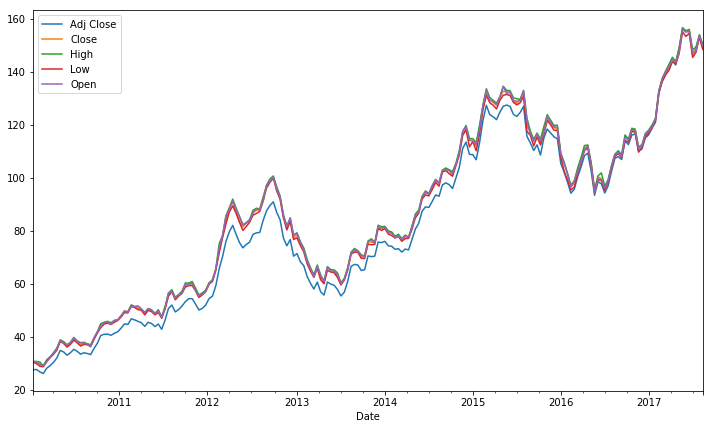

In [ ]:
# Drop `Volume`, since it's way bigger than everything else.
aapl.drop('Volume', axis=1).resample('2W').max().plot();

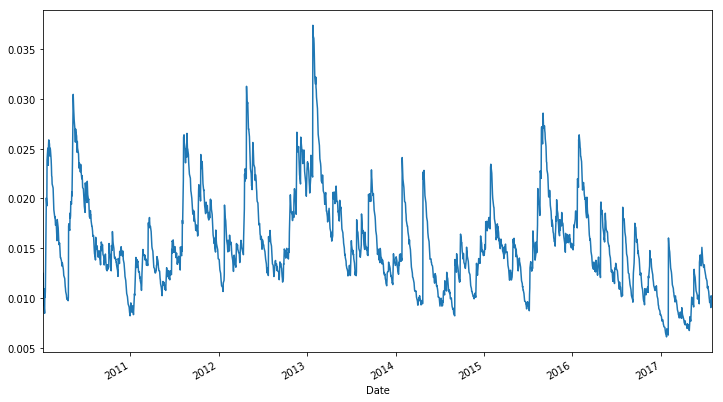

In [ ]:
# 30-day rolling exponentially-weighted stddev of returns.
aapl['Close'].pct_change().ewm(span=30).std().plot();

# "Real World" Data

In [56]:
from demos.avocados import read_avocadata

avocados = read_avocadata('2014', '2016')
avocados.head()

ModuleNotFoundError: No module named 'demos'

In [ ]:
# Unlike numpy arrays, pandas DataFrames can have a different dtype for each column.
avocados.dtypes

,0
Date,"datetime64[ns, UTC]"
Region,object
Variety,object
Organic,bool
Number of Stores,int64
Weighted Avg Price,float64
Low Price,float64
High Price,float64


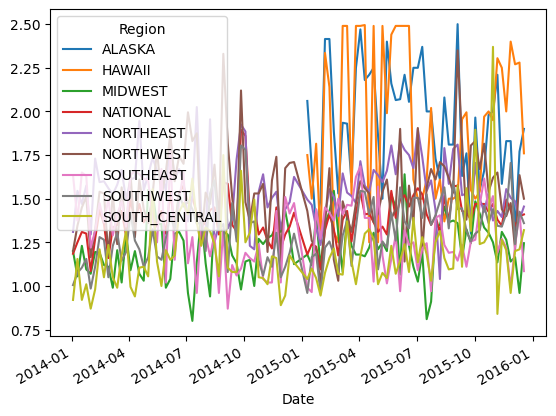

In [ ]:
# What's the regional average price of a HASS avocado every day?
hass = avocados[avocados.Variety == 'HASS']
hass.groupby(['Date', 'Region'])['Weighted Avg Price'].mean().unstack().ffill().plot();

In [ ]:
def _organic_spread(group):

    if len(group.columns) != 2:
        return pd.Series(index=group.index, data=0.0)

    is_organic = group.columns.get_level_values('Organic').values.astype(bool)
    organics = group.loc[:, is_organic].squeeze()
    non_organics = group.loc[:, ~is_organic].squeeze()
    diff = organics - non_organics
    return diff

def organic_spread_by_region(df):
    """What's the difference between the price of an organic
    and non-organic avocado within each region?
    """
    return (
        df
        .set_index(['Date', 'Region', 'Organic'])
         ['Weighted Avg Price']
        .unstack(level=['Region', 'Organic'])
        .ffill()
        .groupby(level='Region', axis=1)
        .apply(_organic_spread)
    )

<ipython-input-161-9b1d8a2f0dc1>:17: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  df


NameError: name 'plt' is not defined

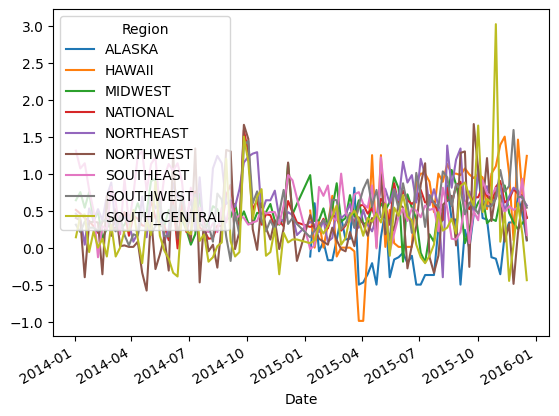

In [ ]:
organic_spread_by_region(hass).plot();
plt.gca().set_title("Daily Regional Organic Spread");
plt.legend(bbox_to_anchor=(1, 1));

In [ ]:
spread_correlation = organic_spread_by_region(hass).corr()
spread_correlation

<ipython-input-161-9b1d8a2f0dc1>:17: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  df


Region,ALASKA,HAWAII,MIDWEST,NATIONAL,NORTHEAST,NORTHWEST,SOUTHEAST,SOUTHWEST,SOUTH_CENTRAL
Region,,,,,,,,,
ALASKA,1.000000,0.202723,0.175251,0.007844,0.051049,0.087575,0.129079,-0.070868,0.161624
HAWAII,0.202723,1.000000,-0.021116,0.373914,0.247171,0.341155,0.019388,0.159192,0.092632
MIDWEST,0.175251,-0.021116,1.000000,0.062595,-0.010213,-0.043783,0.047437,-0.059128,0.068902
NATIONAL,0.007844,0.373914,0.062595,1.000000,0.502035,0.579102,-0.040539,0.635006,0.486524
NORTHEAST,0.051049,0.247171,-0.010213,0.502035,1.000000,0.242039,-0.236225,0.360389,0.149881
NORTHWEST,0.087575,0.341155,-0.043783,0.579102,0.242039,1.000000,-0.032306,0.165992,0.349935
SOUTHEAST,0.129079,0.019388,0.047437,-0.040539,-0.236225,-0.032306,1.000000,-0.167631,-0.021176
SOUTHWEST,-0.070868,0.159192,-0.059128,0.635006,0.360389,0.165992,-0.167631,1.000000,0.254504
SOUTH_CENTRAL,0.161624,0.092632,0.068902,0.486524,0.149881,0.349935,-0.021176,0.254504,1.000000


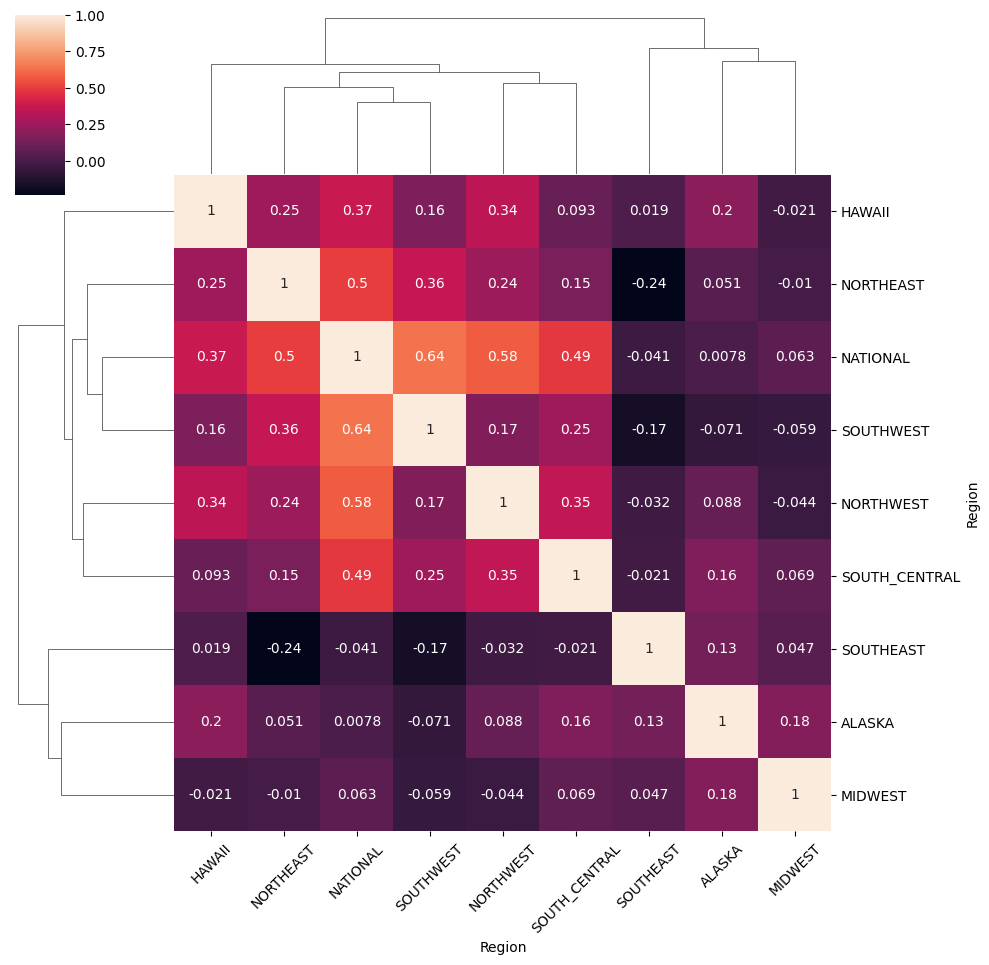

In [ ]:
import seaborn as sns
grid = sns.clustermap(spread_correlation, annot=True)
fig = grid.fig
axes = fig.axes
ax = axes[2]
ax.set_xticklabels(ax.get_xticklabels(), rotation=45);

# Pandas Review

- Pandas extends numpy with more complex datastructures and algorithms.
- If you understand numpy, you understand 90% of pandas.
- `groupby`, `set_index`, and `unstack` are powerful tools for working with categorical data.
- Avocado prices are surprisingly interesting :)

# Thanks!

Own Example: Datos abiertos del gobierno

*Los datos abiertos son información pública dispuesta en formatos que permiten su uso y reutilización bajo licencia abierta y sin restricciones legales para su aprovechamiento. En Colombia, la Ley 1712 de 2014 de la Ley de Transparencia y del Derecho de Acceso a la Información Pública Nacional*




In [57]:
import requests
import pandas as pd

response = requests.get('https://www.datos.gov.co/resource/vtub-3de2.json')
data = response.json()

resultados = pd.DataFrame(data)


resultados.head()

,id,a_o_del_hecho,sexo_de_la_victima,grupo_de_edad_de_la_victima,mes_del_hecho,dia_del_hecho,departamento_del_hecho_dane,municipio_del_hecho_dane,lesion_fatal_de_causa_externa,estado
0,1,2016,Hombre,(25 a 29),Enero,Jueves,Meta,Acacías,Violenta - Homicidios,Datos definitivos
1,2,2016,Hombre,(20 a 24),Enero,Miércoles,Meta,Acacías,Violenta - Homicidios,Datos definitivos
2,3,2016,Hombre,(65 a 69),Enero,Miércoles,Meta,Acacías,Violenta - Homicidios,Datos definitivos
3,4,2016,Mujer,(10 a 14),Enero,Miércoles,Meta,Acacías,Violenta - Homicidios,Datos definitivos
4,5,2016,Hombre,(50 a 54),Enero,Martes,Cesar,Aguachica,Violenta - Homicidios,Datos definitivos


In [58]:
resultados_arauca = resultados.loc[resultados['departamento_del_hecho_dane'] == 'Arauca']
resultados_arauca

,id,a_o_del_hecho,sexo_de_la_victima,grupo_de_edad_de_la_victima,mes_del_hecho,dia_del_hecho,departamento_del_hecho_dane,municipio_del_hecho_dane,lesion_fatal_de_causa_externa,estado
119,120,2016,Hombre,(15 a 17),Enero,Viernes,Arauca,Tame,Violenta - Homicidios,Datos definitivos
859,860,2016,Hombre,(18 a 19),Enero,Miércoles,Arauca,Tame,Violenta - Homicidios,Datos definitivos
860,861,2016,Hombre,(20 a 24),Enero,Miércoles,Arauca,Tame,Violenta - Homicidios,Datos definitivos
993,994,2016,Hombre,(15 a 17),Febrero,Sábado,Arauca,Puerto Rondón,Violenta - Homicidios,Datos definitivos
994,995,2016,Hombre,(25 a 29),Febrero,Sábado,Arauca,Puerto Rondón,Violenta - Homicidios,Datos definitivos
995,996,2016,Hombre,(20 a 24),Febrero,Sábado,Arauca,Puerto Rondón,Violenta - Homicidios,Datos definitivos
996,997,2016,Hombre,(45 a 49),Febrero,Viernes,Arauca,Arauca,Violenta - Homicidios,Datos definitivos
997,998,2016,Mujer,(15 a 17),Febrero,Sábado,Arauca,Puerto Rondón,Violenta - Homicidios,Datos definitivos
998,999,2016,Hombre,(30 a 34),Febrero,Sábado,Arauca,Puerto Rondón,Violenta - Homicidios,Datos definitivos
999,1000,2016,Hombre,(20 a 24),Febrero,Sábado,Arauca,Puerto Rondón,Violenta - Homicidios,Datos definitivos


In [59]:
victimas_por_dpto = resultados.groupby('departamento_del_hecho_dane')['a_o_del_hecho'].count()
victimas_por_dpto

,a_o_del_hecho
departamento_del_hecho_dane,
Amazonas,1
Antioquia,124
Arauca,10
Atlántico,50
"Bogotá, D.C.",90
Bolívar,41
Boyacá,6
Caldas,19
Caquetá,6


In [60]:
resultados.dtypes

,0
id,object
a_o_del_hecho,object
sexo_de_la_victima,object
grupo_de_edad_de_la_victima,object
mes_del_hecho,object
dia_del_hecho,object
departamento_del_hecho_dane,object
municipio_del_hecho_dane,object
lesion_fatal_de_causa_externa,object
estado,object


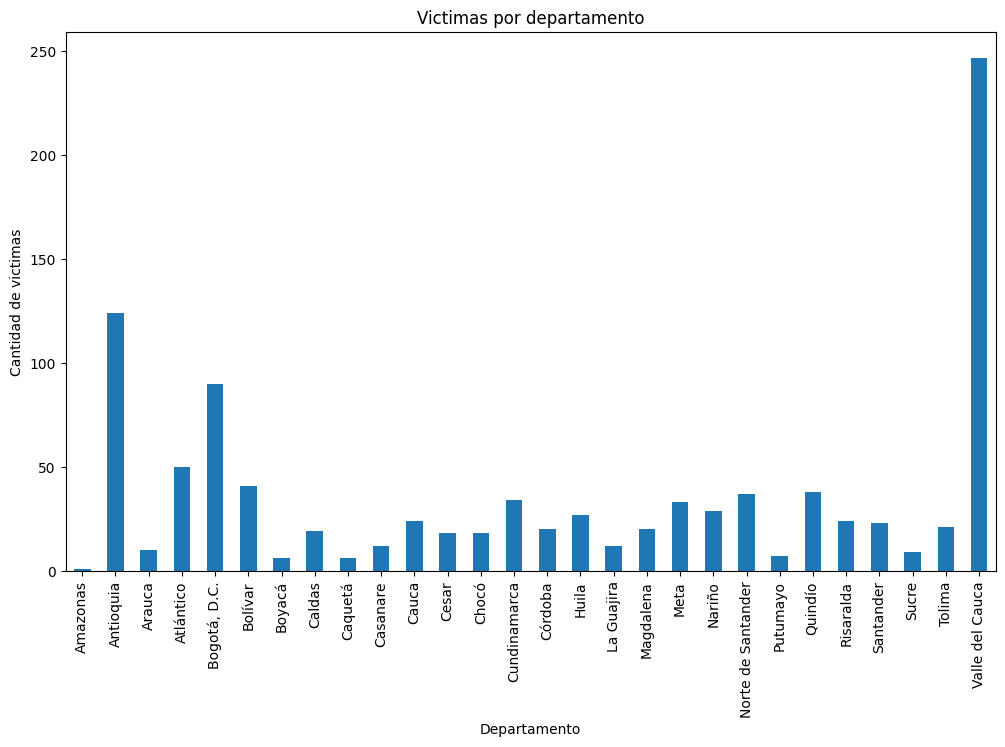

In [61]:
import matplotlib.pyplot as plt
victimas_por_dpto2 = resultados.groupby('departamento_del_hecho_dane')['a_o_del_hecho'].count()
victimas_por_dpto2.plot(kind='bar')
plt.title('Victimas por departamento')
plt.xlabel('Departamento')
plt.ylabel('Cantidad de victimas')
plt.show()

In [62]:
def _organic_spread(group):

    if len(group.columns) != 2:
        return pd.Series(index=group.index, data=0.0)

    is_organic = group.columns.get_level_values('Organic').values.astype(bool)
    organics = group.loc[:, is_organic].squeeze()
    non_organics = group.loc[:, ~is_organic].squeeze()
    diff = organics - non_organics
    return diff

def organic_spread_by_region(df):
    """What's the difference between the price of an organic
    and non-organic avocado within each region?
    """
    return (
        df
        .set_index(['Date', 'Region', 'Organic'])
         ['Weighted Avg Price']
        .unstack(level=['Region', 'Organic'])
        .ffill()
        .groupby(level='Region', axis=1)
        .apply(_organic_spread)
    )

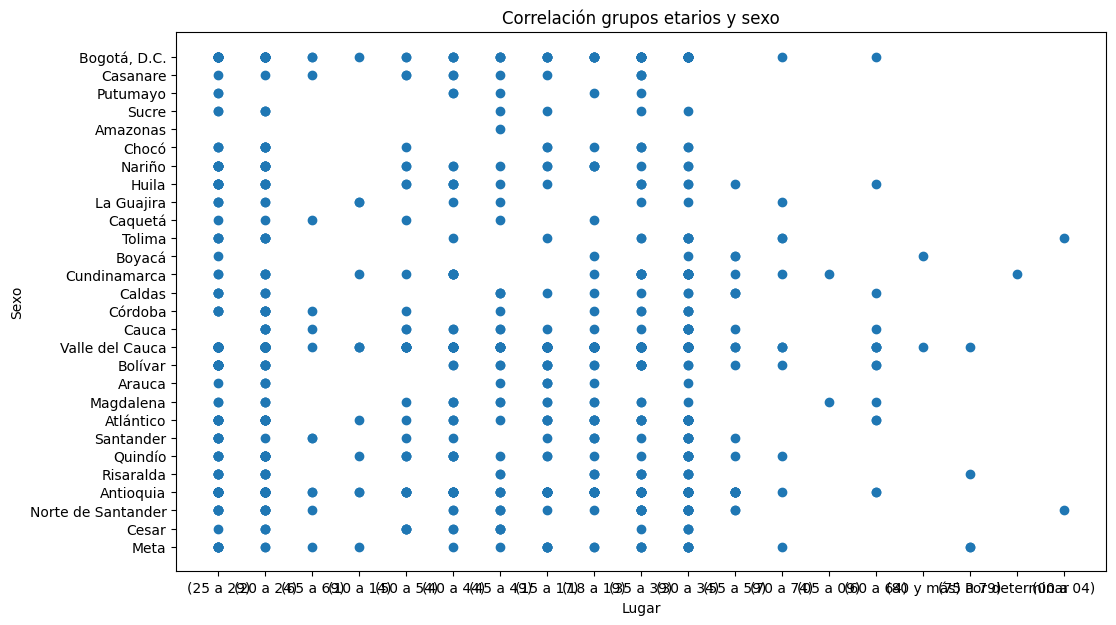

In [63]:
plt.scatter(resultados['grupo_de_edad_de_la_victima'], resultados['departamento_del_hecho_dane'])
plt.xlabel('Lugar')
plt.ylabel('Sexo')
plt.title('Correlación grupos etarios y sexo')
plt.show()